# Import Libraries

In [24]:
from pathlib import Path
from config import Config
import matplotlib.pyplot as plt
import random
import torch
import numpy as np

from torchvision.io import read_video
from data.clipping import ClipTransform
from models import x3d

 



In [19]:
video_path = "/home/predator/Desktop/college_project/Video-Action-Classification/dataset/val/pass-play/gam1d9bfdb5e4_46m58s_47m05s_clip_046.mp4"
video, _, _ = read_video(video_path, pts_unit="sec")
print(f"Original video shape: {video.shape}")  # [frames, H, W, C]


Original video shape: torch.Size([34, 172, 54, 3])


/home/predator/Desktop/college_project/Video-Action-Classification/playtype-env/lib/python3.12/site-packages/torchvision/io/_video_deprecation_warning.py:9: UserWarning: The video decoding and encoding capabilities of torchvision are deprecated from version 0.22 and will be removed in version 0.24. We recommend that you migrate to TorchCodec, where we'll consolidate the future decoding/encoding capabilities of PyTorch: https://github.com/pytorch/torchcodec
  warnings.warn(


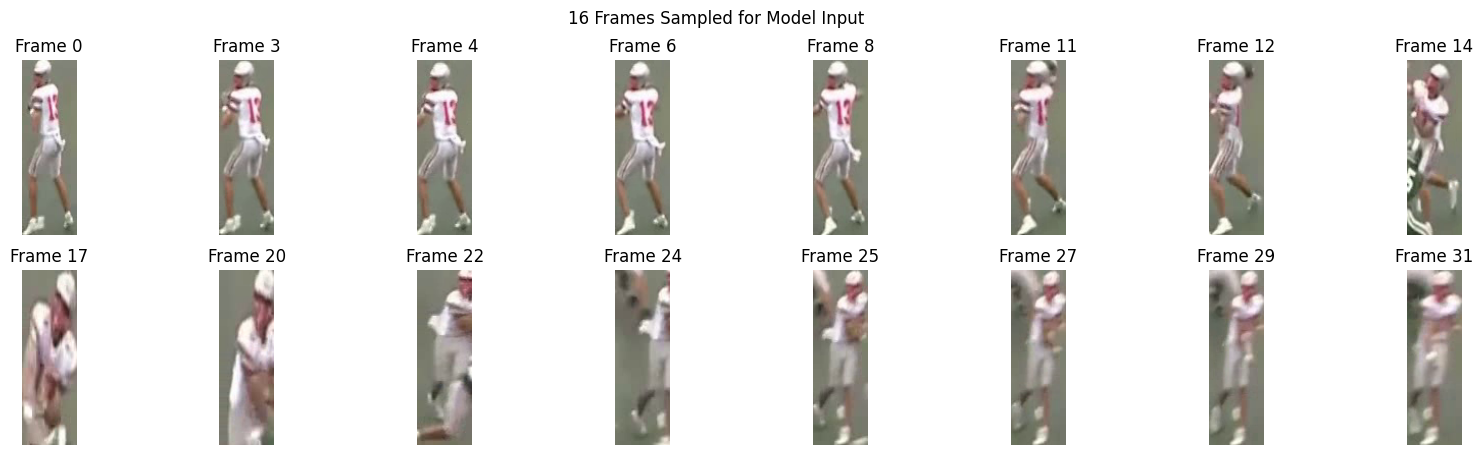

In [21]:
from utils.misc import FrameSampler

NUM_FRAMES = 16
sampler = FrameSampler()
indices = sampler.uniform_indices(NUM_FRAMES, video.shape[0])
frames = [video[i] for i in indices]

# Show sampled frames
fig, axes = plt.subplots(2, 8, figsize=(20,5))
for ax, frame, idx in zip(axes.flatten(), frames, indices):
    ax.imshow(frame.numpy())
    ax.set_title(f"Frame {idx}")
    ax.axis('off')
plt.suptitle("16 Frames Sampled for Model Input")
plt.show()


In [22]:
transform = ClipTransform(Config.IMG_SIZE, training=False)
clip = transform(frames).unsqueeze(0)  # add batch dimension
print(f"Clip shape (for model): {clip.shape}")  # [1, 3, T, H, W]


Clip shape (for model): torch.Size([1, 3, 16, 224, 224])


In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = x3d.X3DPlayClassifier(num_classes=len(Config.CLASS_NAMES))
model.load_state_dict(torch.load("/home/predator/Desktop/college_project/Video-Action-Classification/x3d_playtype.pth", map_location=device))
model.to(device)
model.eval()

with torch.no_grad():
    clip = clip.to(device)
    output = model(clip)
    pred_idx = torch.argmax(output, dim=1).item()
    pred_class = Config.CLASS_NAMES[pred_idx]

print(f"Predicted Play Type: {pred_class}")


Predicted Play Type: pass-play
